In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car = pd.read_csv('Cleaned_data.csv')

In [3]:
car.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

## Descriptive statistic

In [4]:
car.describe(include='all')

,Brand,Year,Model,Title,UsedOrNew,Transmission,FuelType,Kilometres,CylindersinEngine,BodyType,Price,Colour
count,15094,15094.000000,15094,15094,15094,15094,15094,15094.000000,15094.000000,15094,1.509400e+04,15094
unique,66,NaN,706,2199,3,2,8,NaN,NaN,9,NaN,18
top,Toyota,NaN,Hilux,Toyota Corolla Ascent,USED,Automatic,Unleaded,NaN,NaN,SUV,NaN,White
freq,2477,NaN,409,256,14056,13349,6643,NaN,NaN,6426,NaN,5707
mean,NaN,2016.124155,NaN,NaN,NaN,NaN,NaN,99520.925666,4.392938,NaN,3.546831e+04,NaN
std,NaN,4.993770,NaN,NaN,NaN,NaN,NaN,77743.853531,1.069211,NaN,3.234181e+04,NaN
min,NaN,1959.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,8.800000e+01,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,40968.250000,4.000000,NaN,1.899000e+04,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,85105.000000,4.000000,NaN,2.899000e+04,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,145498.500000,4.000000,NaN,4.299000e+04,NaN


In [5]:
car.describe()

,Year,Kilometres,CylindersinEngine,Price
count,15094.000000,15094.000000,15094.000000,1.509400e+04
mean,2016.124155,99520.925666,4.392938,3.546831e+04
std,4.993770,77743.853531,1.069211,3.234181e+04
min,1959.000000,0.000000,0.000000,8.800000e+01
25%,2013.000000,40968.250000,4.000000,1.899000e+04
50%,2017.000000,85105.000000,4.000000,2.899000e+04
75%,2020.000000,145498.500000,4.000000,4.299000e+04
max,2023.000000,533849.000000,12.000000,1.500000e+06


#### 75% of Price are less than 50000.

## Data Visaulization



#### Finding outlier

In [6]:
Q1 = 18990
Q2 = 28990
Q3 = 42990
IQR = Q3-Q1
upperFence = Q3+(IQR*1.5)
lowerFence = Q3-(IQR*1.5)

(lowerFence,upperFence)


(6990.0, 78990.0)

In [7]:
cars=car[car['Price']<100000]

#### Car Price Distribution for price below 100000

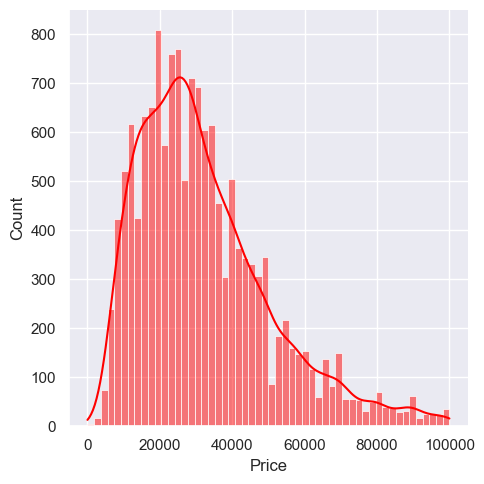

In [8]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
sns.displot(cars['Price'], color="red",kde=True)

plt.show()

#### plotting categorical variable vs Price

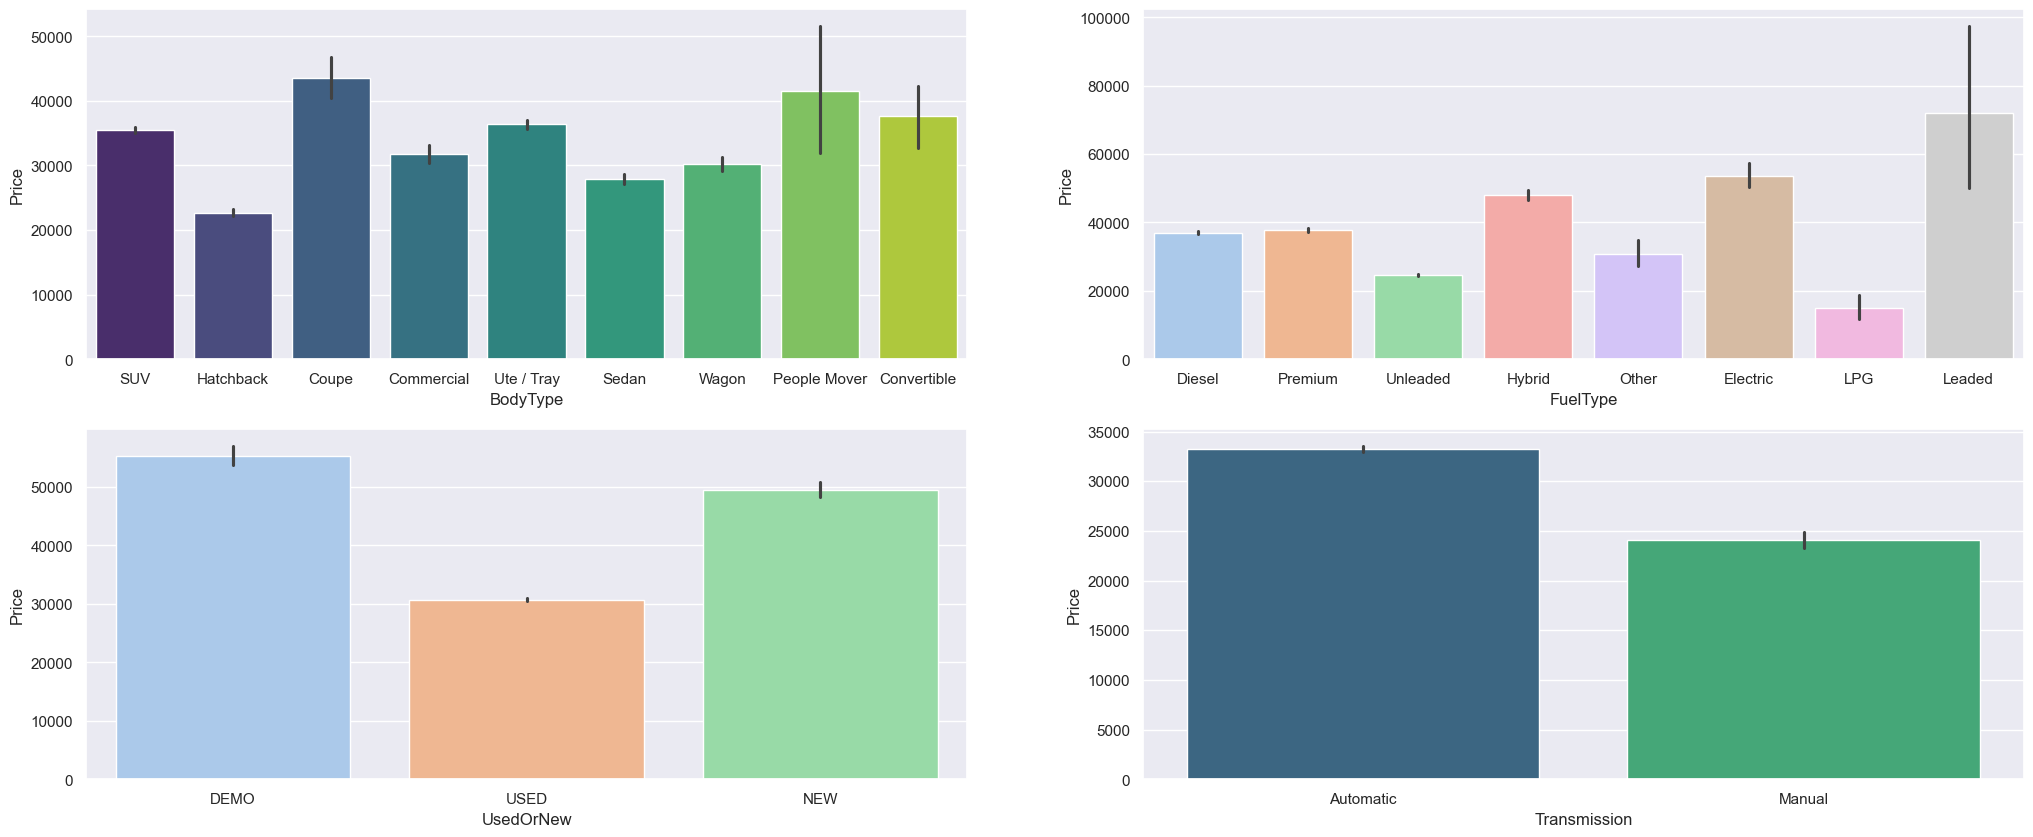

In [9]:

plt.figure(figsize=(25,10))
plt.subplot(2, 2, 1)
sns.barplot(x=cars.BodyType, y=cars.Price,palette='viridis')

plt.subplot(2, 2, 2)
sns.barplot(x=cars.FuelType, y=cars.Price, palette='pastel')

plt.subplot(2, 2, 3)
sns.barplot(x=cars.UsedOrNew, y=cars.Price,palette='pastel')

plt.subplot(2, 2, 4)
sns.barplot(x=cars.Transmission, y=cars.Price,palette='viridis')

plt.show()

#### Checking relationship of Brand with Price

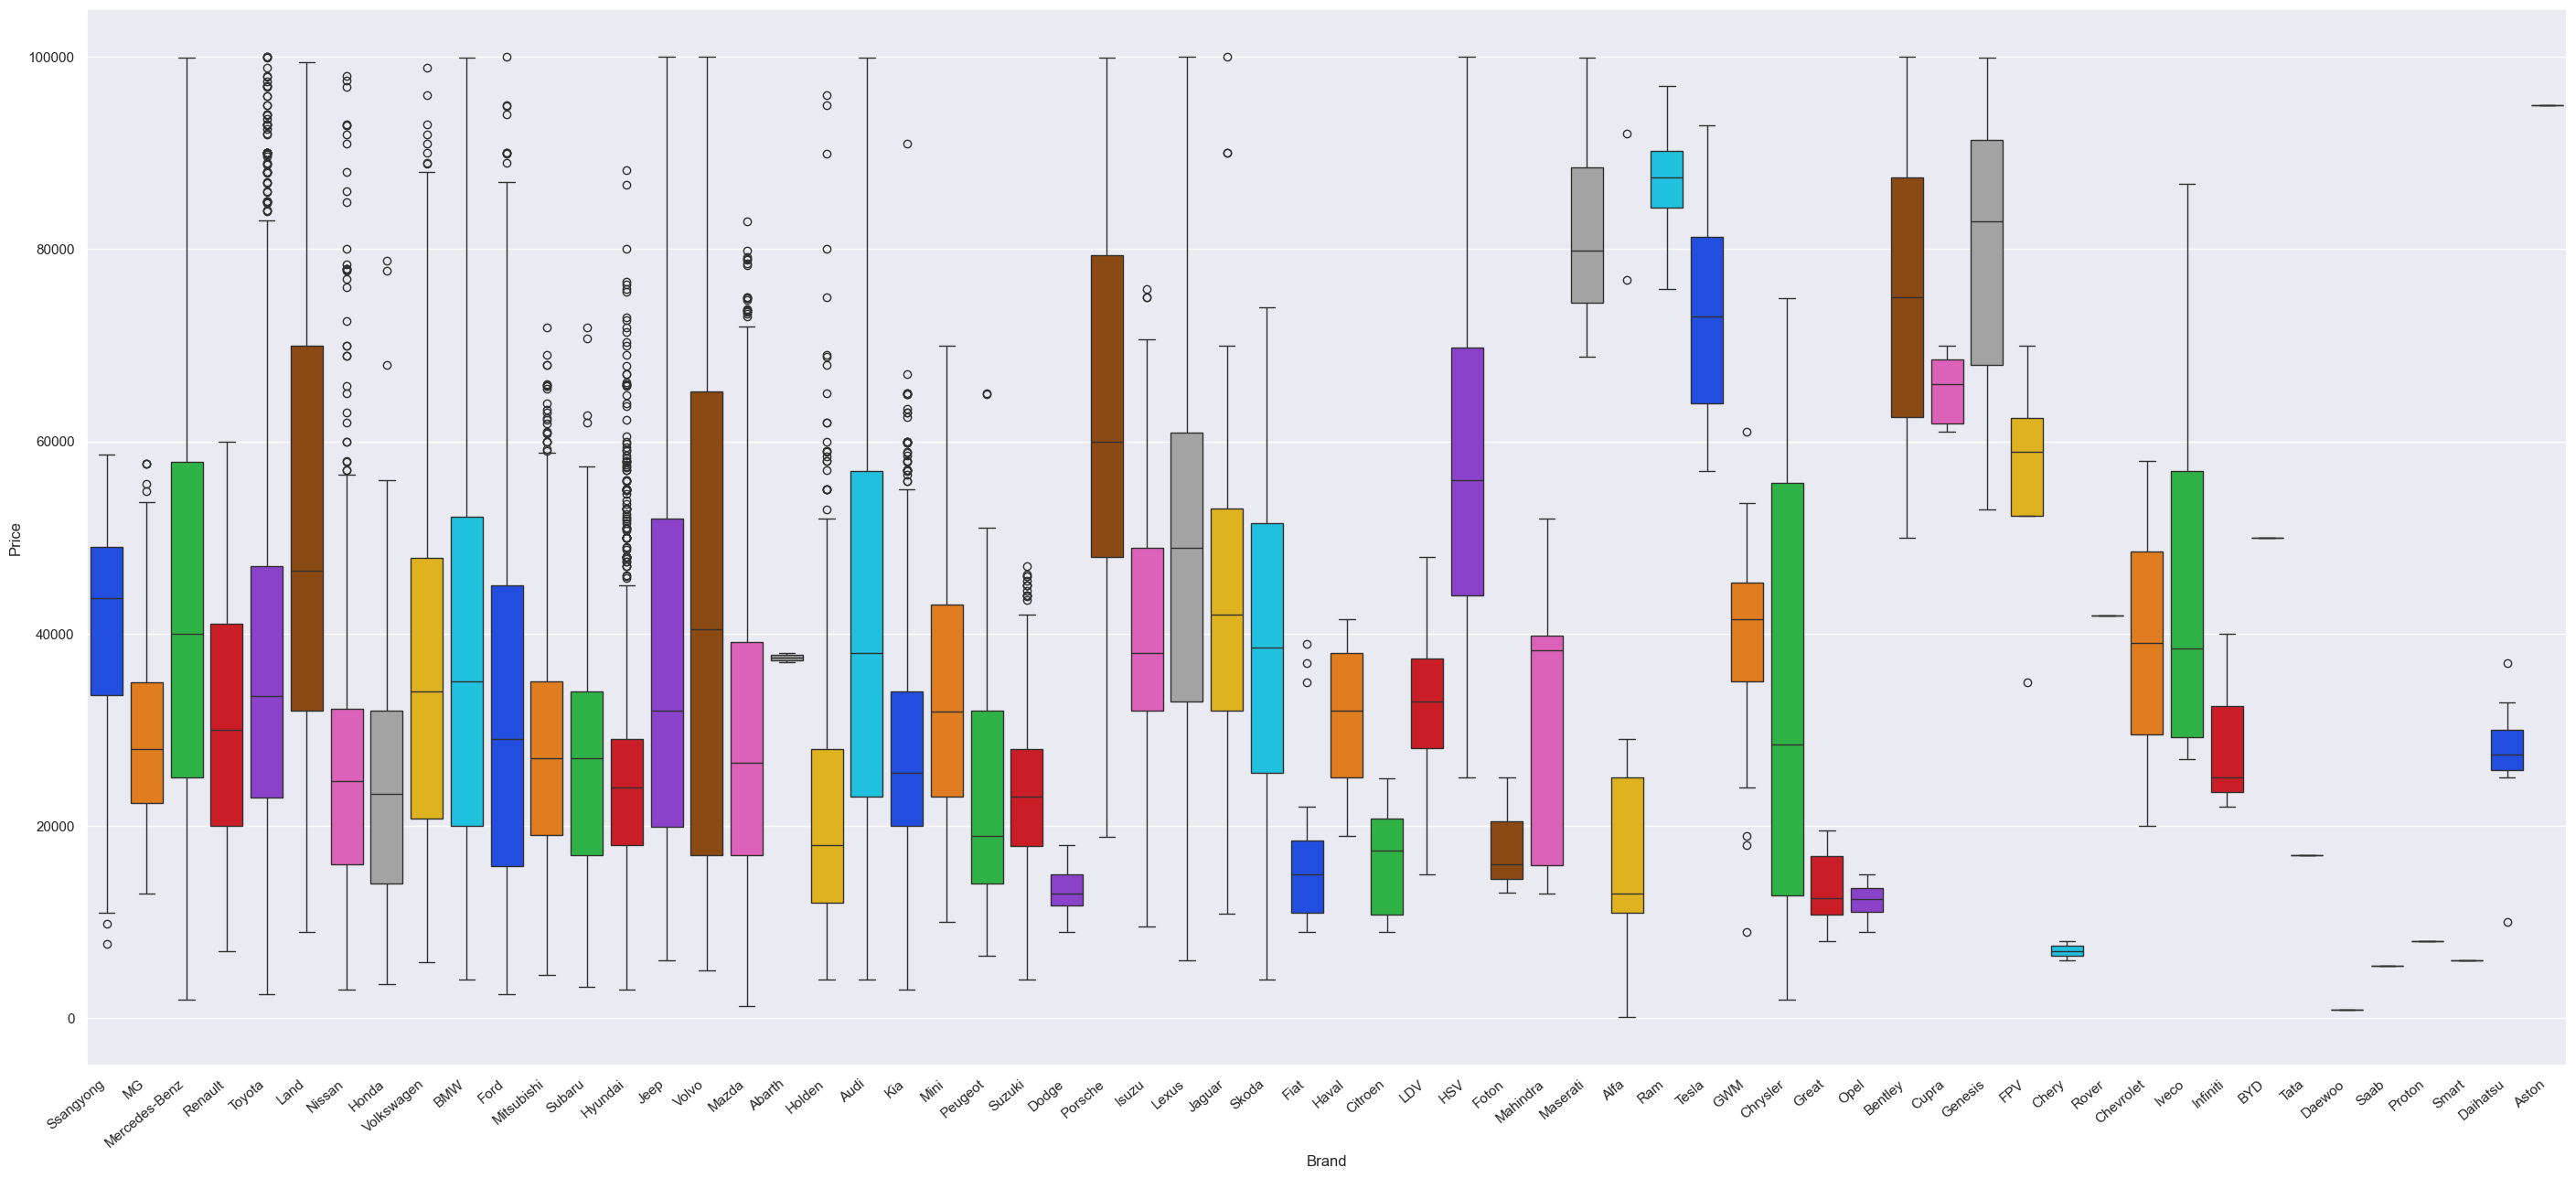

In [10]:
plt.figure(figsize=(35,15))
ax=sns.boxplot(x='Brand',y='Price',data=cars,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

#### Average price for each car brand

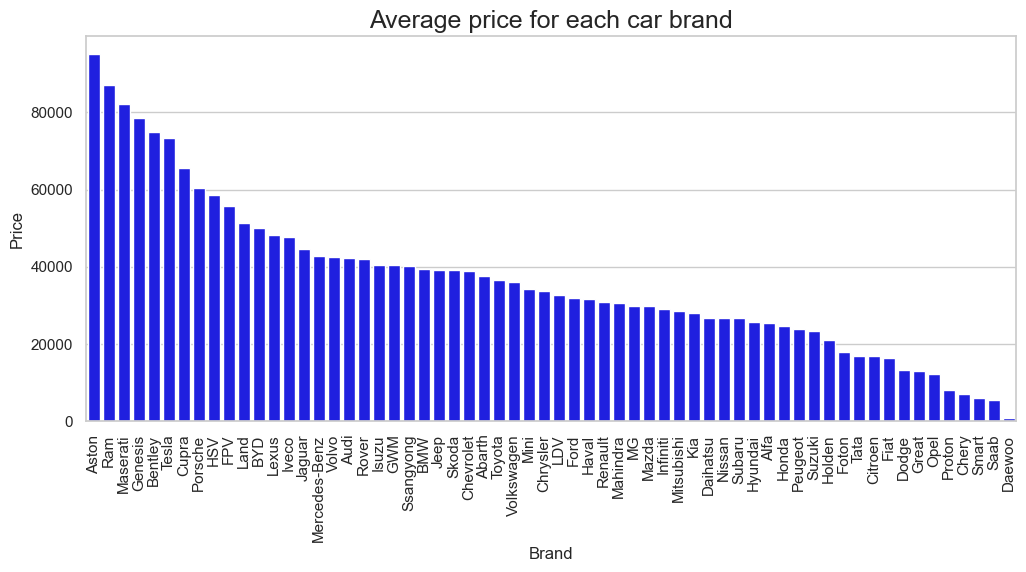

In [11]:
mode_l=pd.DataFrame(cars.groupby('Brand')['Price'].mean()).reset_index(inplace= False)
mode_l
mode_l.sort_values("Price", ascending=False)
model_sorted= mode_l.sort_values("Price", ascending=False)
fig= plt.figure(figsize=(12,5))
# make bar plot with sns
sns.set_style("whitegrid")
sns_plot = sns.barplot(x = 'Brand', y = 'Price', data = model_sorted, color='blue')
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Average price for each car brand", size=18)
plt.show()

#### Checking relationship of Year with Price

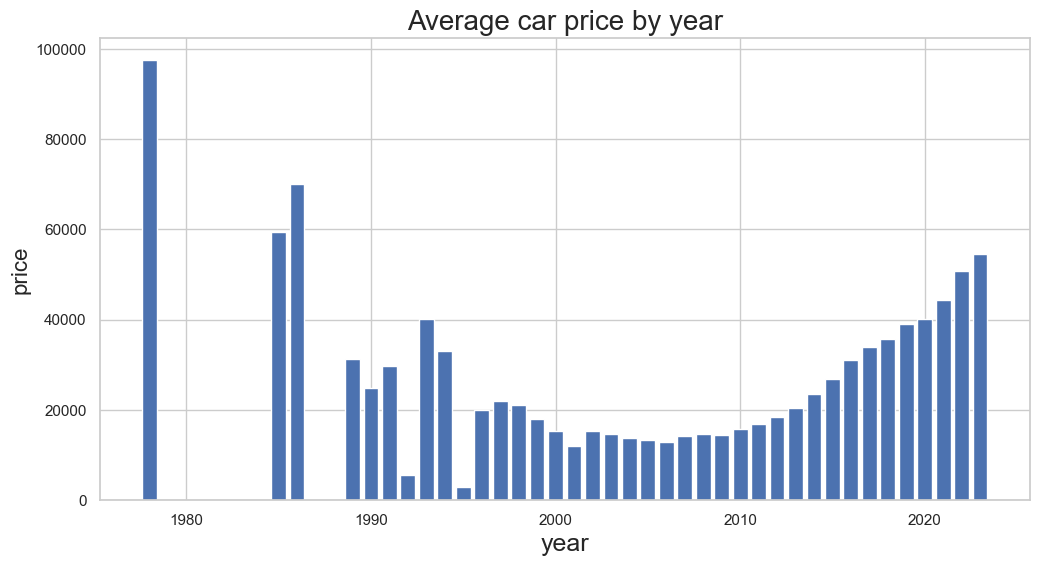

In [12]:
year_price = pd.DataFrame(cars.groupby('Year')['Price'].mean()).sort_values('Price',ascending=False).reset_index(inplace= False)
fig= plt.figure(figsize=(12, 6))
plt.bar('Year','Price', data= year_price)
plt.title('Average car price by year', fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('price',fontsize=16)
plt.show()

#### Checking relationship of Top 20 Model with Price

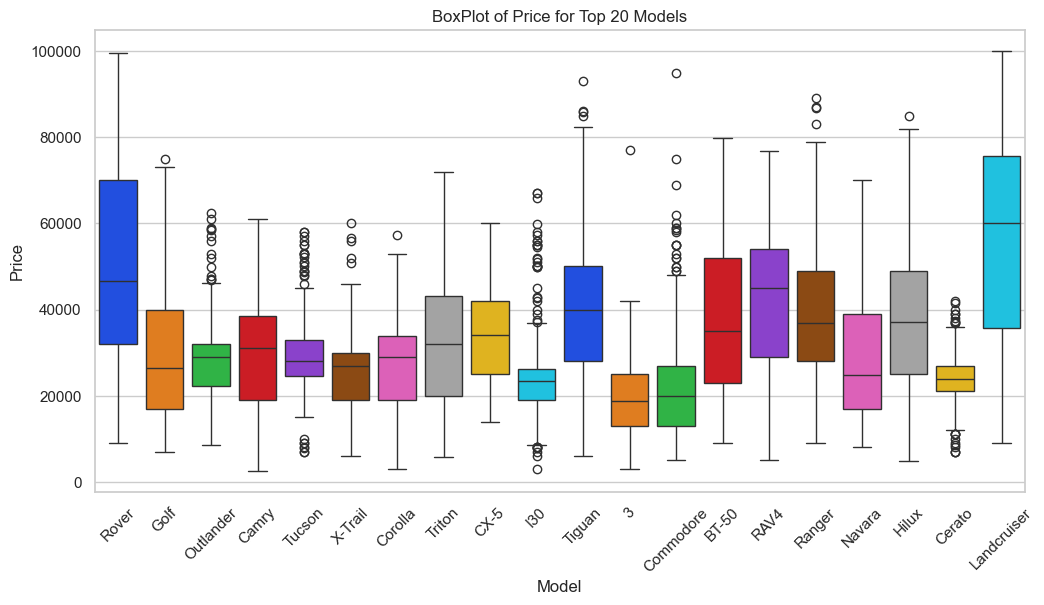

In [13]:
top_n_models = car['Model'].value_counts().nlargest(20).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price',palette='bright', data=cars[cars['Model'].isin(top_n_models)])
plt.xticks(rotation=45)
plt.title(f'BoxPlot of Price for Top {20} Models')
plt.show()

#### Checking relationship of BodyType with Price

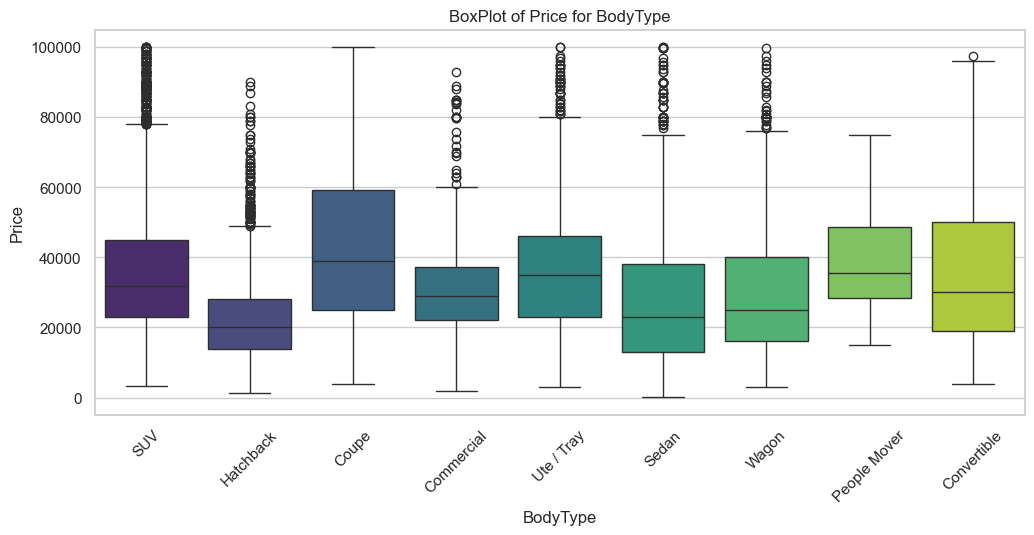

In [14]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='BodyType', y='Price', data=cars,palette='viridis')
plt.xticks(rotation=45)
plt.title(f'BoxPlot of Price for BodyType')
plt.show()

#### Checking relationship of BodyType, FuelType with Price mixed

<Figure size 1000x600 with 0 Axes>

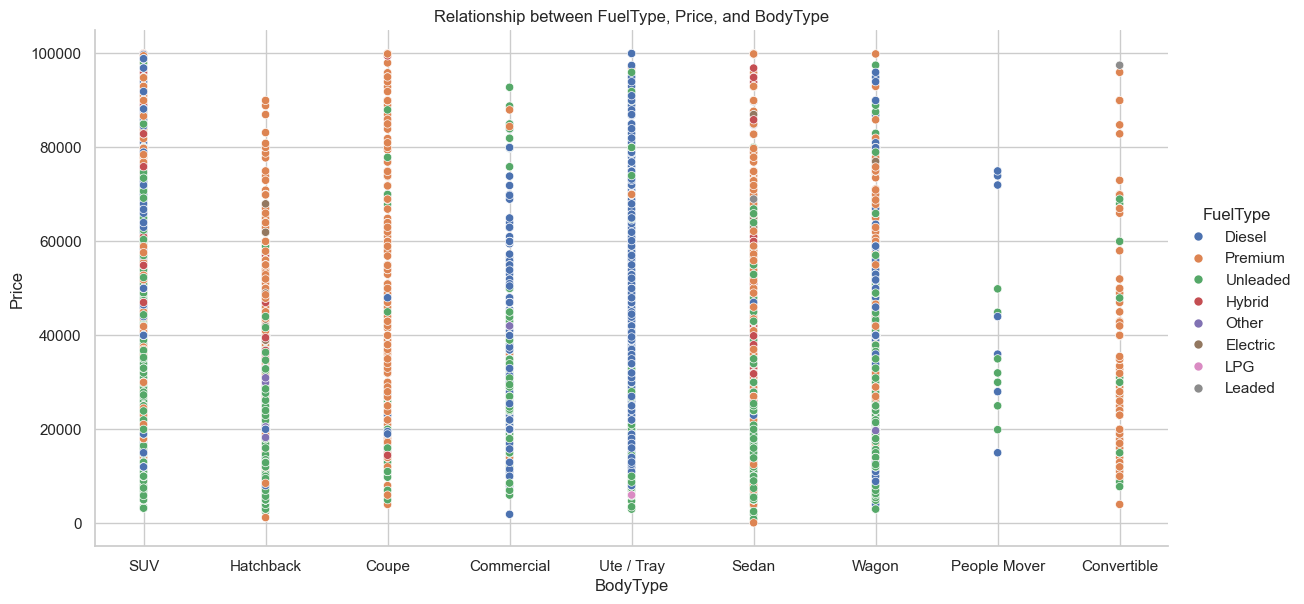

In [15]:
plt.figure(figsize=(10, 6))
sns.relplot(x='BodyType', y='Price', hue='FuelType', data=cars,aspect=2,height=6)
plt.title('Relationship between FuelType, Price, and BodyType')
plt.show()

#### Checking relationship of Kilometres, UsedOrNew with Price mixed

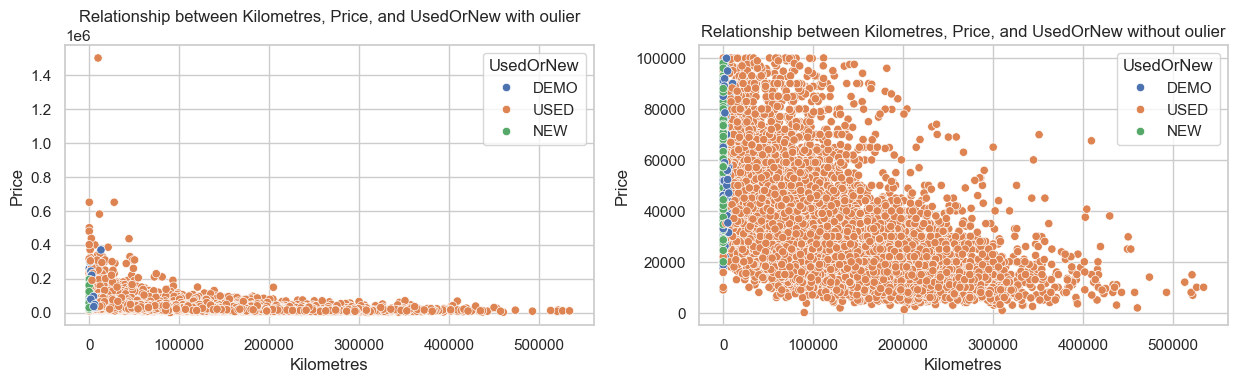

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Kilometres', y='Price',hue='UsedOrNew', data=car)
plt.title('Relationship between Kilometres, Price, and UsedOrNew with oulier')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Kilometres', y='Price',hue='UsedOrNew', data=cars)
plt.title('Relationship between Kilometres, Price, and UsedOrNew without oulier')
plt.show()

#### Checking relationship of Transmission, CylindersinEngine with Price mixed

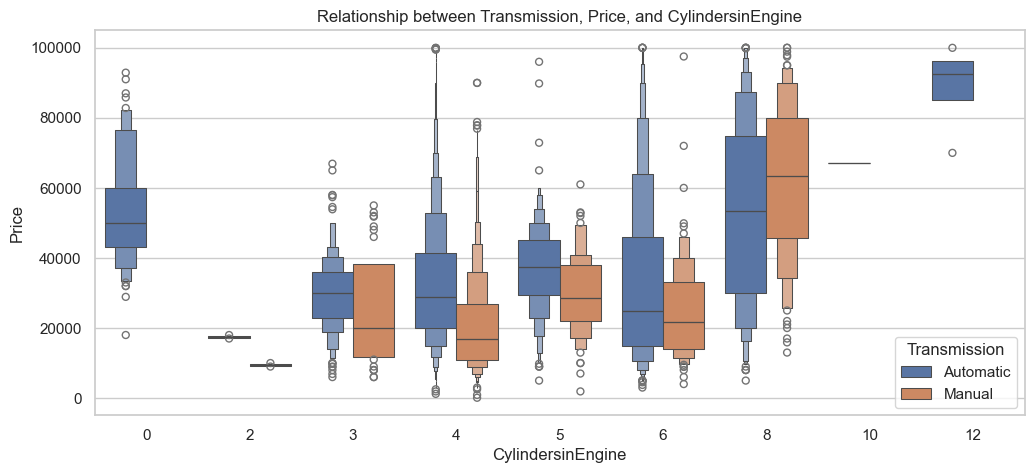

In [17]:
plt.figure(figsize=(12, 5))
sns.boxenplot(x='CylindersinEngine', y='Price', hue='Transmission', data=cars)
plt.title('Relationship between Transmission, Price, and CylindersinEngine')
plt.show()

#### Check Average price by colour

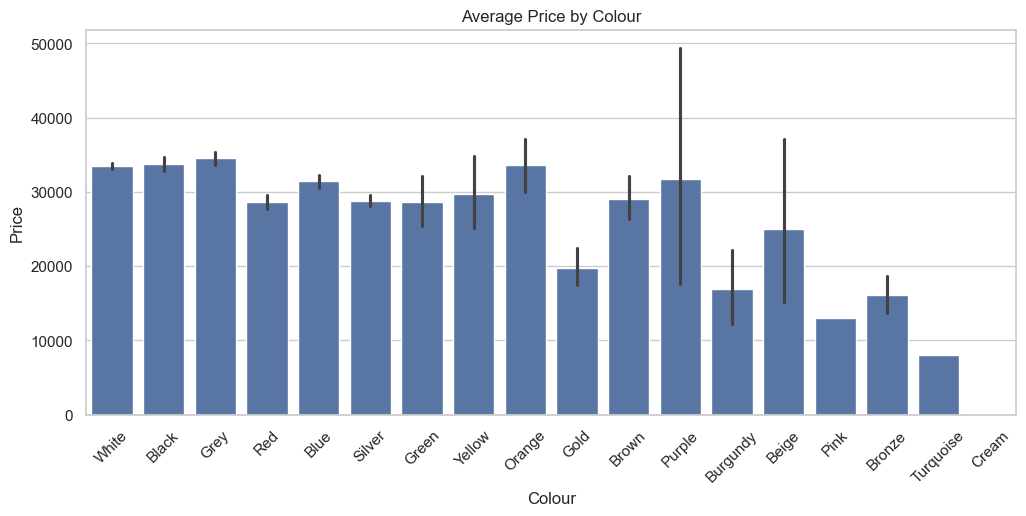

In [18]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Colour', y='Price', data=cars)
plt.xticks(rotation=45)
plt.title('Average Price by Colour')
plt.show()

#### Heatmap of 'Year', 'Price', 'Kilometres', 'CylindersinEngine'

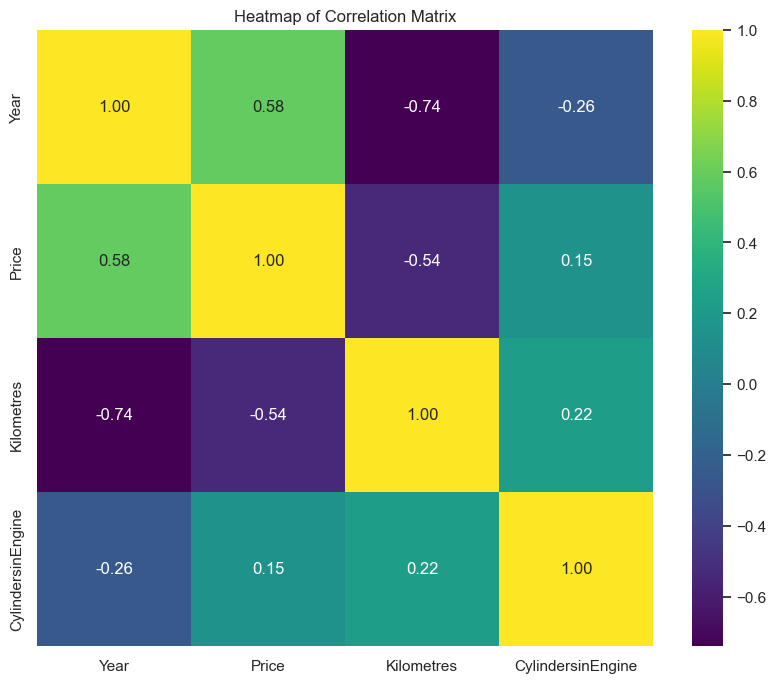

In [19]:
selected_columns = ['Year', 'Price', 'Kilometres', 'CylindersinEngine']
selected_car = cars[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_car.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [20]:
cars.drop('Model', axis=1, inplace=True, errors='ignore')

In [21]:
cars.to_csv('Cleaned_Data_For_MachineLearing.csv')